## This notebook was made to demonstrate the functions on scraping_python_functions, and to show how the data can be aggregated on post-level.

In [4]:
##import everythin and define the reddit connection
from scraping_python_functions import *
reddit=init_reddit()

In [5]:
##Load and process the comment dataset
data_comments=get_comments_from_hot(reddit)
processed_data=process_data(data_comments)

In [6]:
processed_data.head(10)

,text,score,level,post,sentiment,joy,optimism,anger,sadness
0,Down $6k today ![img](emote|t5_2th52|4260),27,top,Weekend Discussion Thread for the Weekend of S...,1,0.508811,0.000000,0.000000,1.642364
1,Lol that exactly what I’m down. It’s all good....,5,second,Weekend Discussion Thread for the Weekend of S...,5,0.000000,2.656628,0.572796,0.000000
2,Literally traded like dogshit this week,24,top,Weekend Discussion Thread for the Weekend of S...,1,2.261142,0.000000,0.000000,1.502195
3,I want to speak to the manager of the stocks m...,23,top,Weekend Discussion Thread for the Weekend of S...,3,1.086675,0.000000,0.288888,0.567407
4,Fondling your gf’s giant bazonkas during an of...,24,top,Weekend Discussion Thread for the Weekend of S...,5,0.000000,3.298110,0.000000,0.000000
5,You want proof that Disney will go back to all...,18,top,Weekend Discussion Thread for the Weekend of S...,1,2.244317,0.000000,0.000000,0.419795
6,Former President Trump says he put “outside pr...,18,top,Weekend Discussion Thread for the Weekend of S...,1,0.000000,0.461372,1.042939,0.000000
7,7.30 and already dark af. ![img](emote|t5_2th5...,18,top,Weekend Discussion Thread for the Weekend of S...,1,0.000000,1.179332,0.000000,0.921949
8,Winter is coming,13,second,Weekend Discussion Thread for the Weekend of S...,5,0.068151,0.000000,0.000000,1.807619
9,Now have to go be social at a friend’s dinner ...,33,top,Weekend Discussion Thread for the Weekend of S...,1,0.153598,0.000000,0.000000,2.415061


### Create the plots for the comment dataset

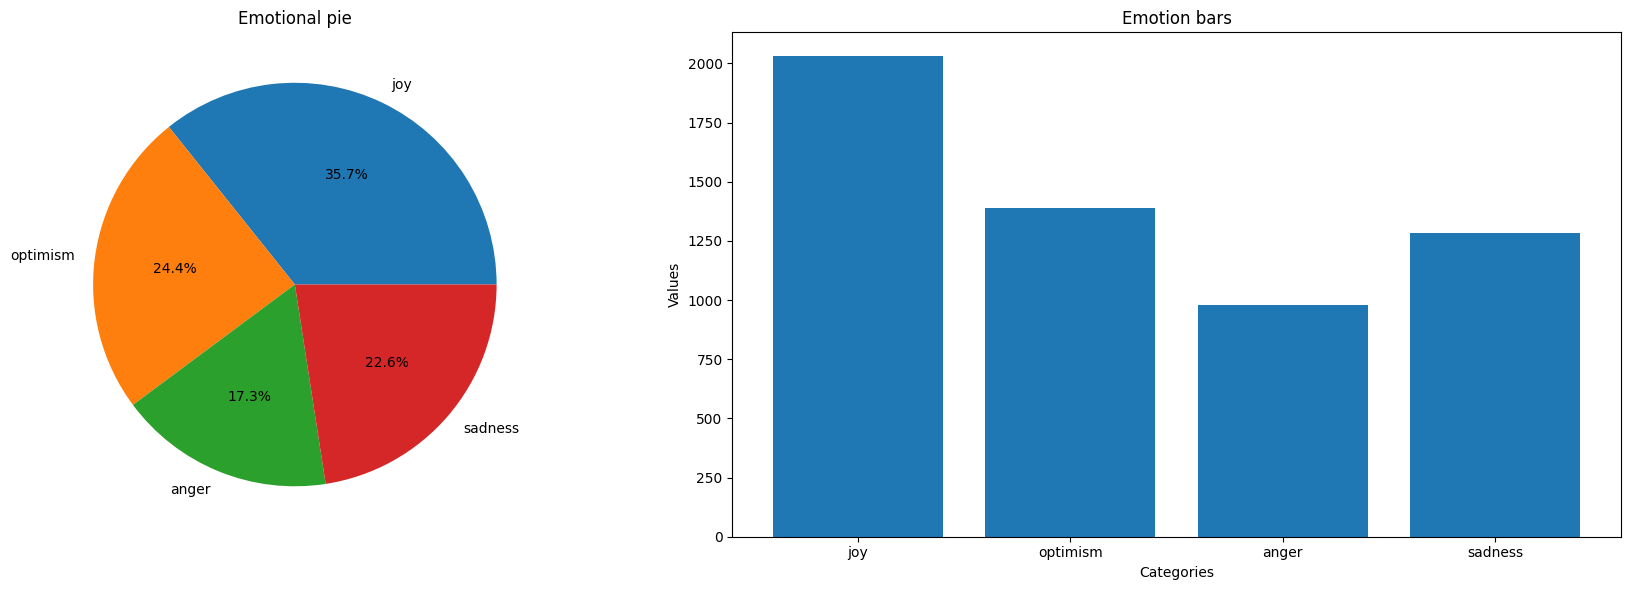

In [36]:
plot_emotions(processed_data)

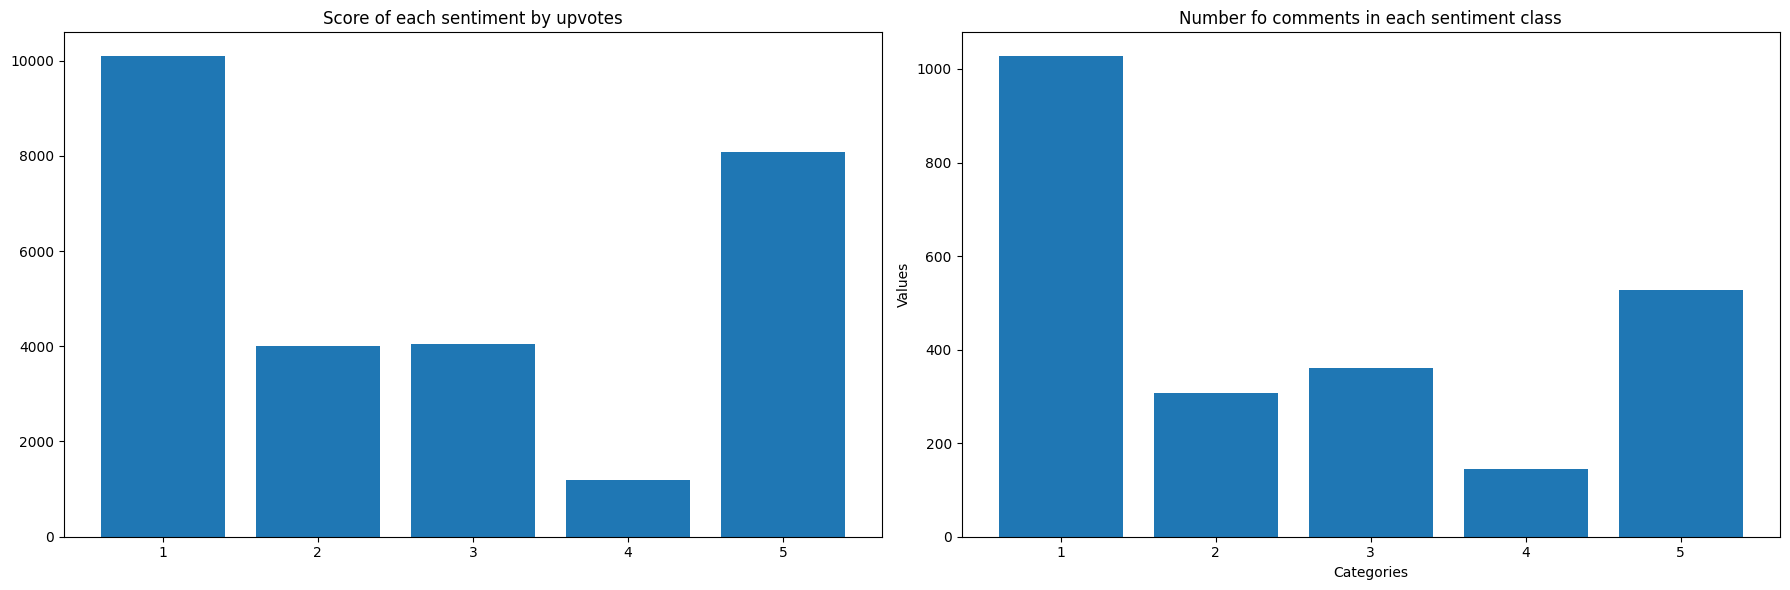

In [8]:
sentiment_barplots(processed_data)

### Show the creation of the post dataset 

In [9]:
##We can probably also make some kind of visualization out of the below data 
# to show which posts performed well, so that the user can reference that while reading the post
# sentiment plot.

post_details=get_post_info(reddit)
processed_post_details=process_data(post_details, text_column="titles")
processed_post_details.head(10)

,ids,titles,scores,controversiality,bodies,original,num_comments,sentiment,joy,optimism,anger,sadness
0,16jn7o3,Weekend Discussion Thread for the Weekend of S...,76,0.89,#Come hang with us on [Discord](https://discor...,False,7607,4,0.000000,1.487355,0.982360,0.000000
1,16ke3iu,Anyone else on team AFRM and SOFI?,41,0.85,,False,38,1,0.500426,0.306836,1.042505,0.000000
2,16kr3df,Found this at a thrift shop today,902,0.96,Which one of you bastards placed this here. Th...,False,60,5,0.000000,2.053643,0.000000,0.000000
3,16kngw6,All this loss porn + job market at a standstil...,466,0.93,Y’all still gonna throw calls on stocks right now,False,172,1,1.081591,0.000000,0.000000,2.331111
4,16kqsap,"To the old wallstreetbet-ers, what was it like...",129,0.83,"Was it like ""WTF? Did you actually lose all $1...",False,101,2,0.000000,0.331074,0.000000,1.610189
5,16kkanj,Roman silver denarius vs FED's balance sheet,326,0.9,,False,94,4,0.775811,0.000000,0.034835,0.066137
6,16kb7tj,Was making 5K then 20K/day after starting the ...,1055,0.93,,False,297,1,0.000000,0.000000,1.097418,0.132424
7,16kpvez,QQQ Puts ♨️♨️♨️♨️,93,0.86,"Okay fellow regards, here's my play going into...",False,110,5,0.000000,2.558129,0.000000,0.000000
8,16k3brl,"Egypt’s inflation rose to 37.4% in Aug, a reco...",2085,0.95,,False,400,1,0.000000,1.417934,0.261756,0.000000
9,16kems9,What could an actual Market Crash look like ri...,386,0.85,For bears that feel we are in an asset bubble ...,False,348,1,0.151757,0.000000,0.000000,2.322545


In [13]:
#Some grouping is done so that the average stats can be plotted

df_groupedby=processed_data.groupby("post").agg({"sentiment":"mean", 
                "joy": "sum", "optimism":"sum", "anger":"sum", "sadness":"sum"})


#change emotion values to be a percentage of a total
df_groupedby[['joy', 'optimism','anger','sadness']] = df_groupedby[['joy', 'optimism','anger','sadness']].apply(
    lambda row: row / row.sum(), axis=1)

df_groupedby.head(10)

,sentiment,joy,optimism,anger,sadness
post,,,,,
All this loss porn + job market at a standstill + student debt payments starting + consumer spending trending downward tells me,2.528736,0.411401,0.201859,0.174039,0.212700
Americans Remain Resilient Against Rising Gas Prices Amidst Easing Inflation Concerns,2.705882,0.420828,0.253765,0.109649,0.215758
Anyone bullish on Nintendo Stock?,2.587629,0.370157,0.253735,0.219838,0.156271
Anyone else on team AFRM and SOFI?,2.781250,0.217238,0.312779,0.244998,0.224985
Dollar General Tso’s Chicken,2.696970,0.485471,0.188863,0.143516,0.182149
"Egypt’s inflation rose to 37.4% in Aug, a record high. Food costs were up 71%. 2%Target?",2.541935,0.422139,0.179553,0.162434,0.235873
Found this at a thrift shop today,2.734694,0.232078,0.389814,0.092252,0.285856
I am long SPY. Should I get out now and wait for a crash?,2.425339,0.271796,0.144492,0.352839,0.230873
Is there any hope for Disney?,2.378906,0.413824,0.189416,0.201475,0.195285


### Create plots hopefully showing the general sentiment and emotions found on currently hot posts.

It might not be correct to show sentiment on the same plot.

/tmp/ipykernel_30115/3022346233.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


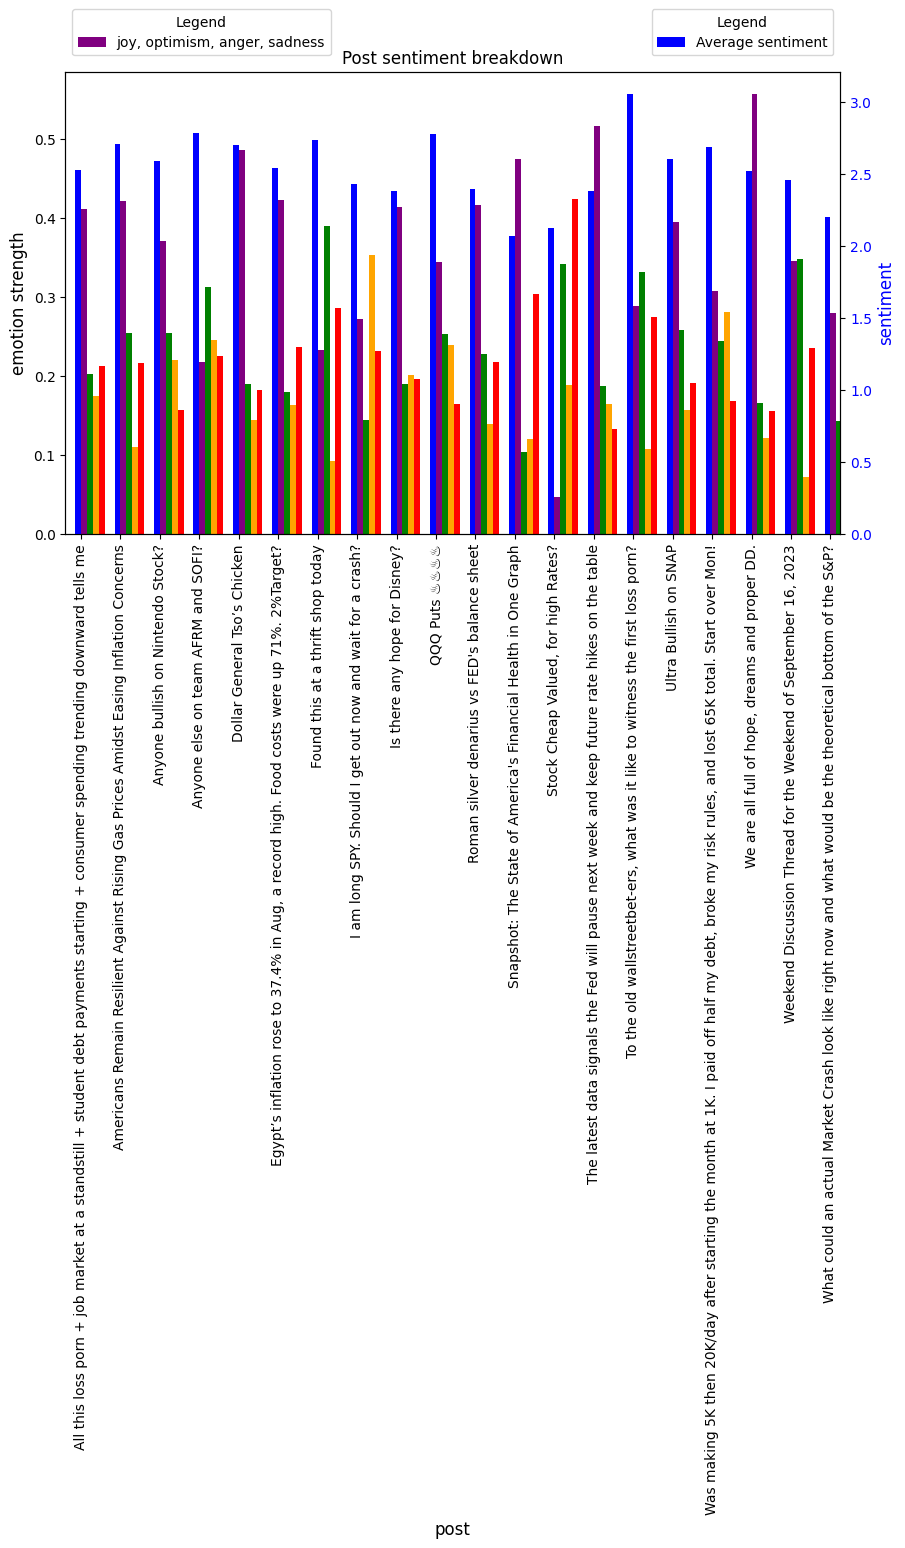

In [34]:
df = df_groupedby

fig, ax1 = plt.subplots(figsize=(10, 6))

colors = ['purple', 'green', 'orange', 'red']
ax1.set_xlabel('Categories', fontsize=12)
ax1.set_ylabel('emotion strength', color='black', fontsize=12)
ax1 = df.drop('sentiment', axis=1).plot(kind='bar', ax=ax1, color=colors, width=0.6, position=0)
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('sentiment', color=color, fontsize=12)
ax2 = df['sentiment'].plot(kind='bar', ax=ax2, color=color, width=0.15, position=1)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Post sentiment breakdown')
ax1.legend(loc='upper left', title='Legend', labels=['joy, optimism, anger, sadness'], bbox_to_anchor=(0.0, 1.15))
ax2.legend(loc='upper right', title='Legend', labels=['Average sentiment'], bbox_to_anchor=(1.0, 1.15))

plt.tight_layout()
plt.savefig("post_breakdown.png")